In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

C:\Users\USER\.conda\envs\cvenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\.conda\envs\cvenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\.conda\envs\cvenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\.conda\envs\cvenv\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Label of the image is 8
(28, 28)


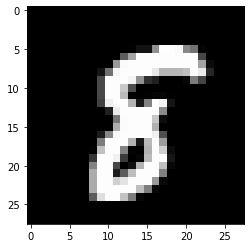

In [6]:
import matplotlib.pyplot as plt
print("Label of the image is", Y_train[2001])
plt.imshow(X_train[2001], cmap='gray')
print(X_train[2001].shape)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [8]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [12]:
X_train/=255
X_test/=255

In [13]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [14]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [17]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_split=0.3)


Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
42000/42000 [==============================] - 165s 4ms/sample - loss: 0.1259 - acc: 0.9619 - val_loss: 0.0612 - val_acc: 0.9827
Epoch 2/5
42000/42000 [==============================] - 162s 4ms/sample - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0540 - val_acc: 0.9848
Epoch 3/5
42000/42000 [==============================] - 165s 4ms/sample - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0692 - val_acc: 0.9822
Epoch 4/5
42000/42000 [==============================] - 175s 4ms/sample - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0635 - val_acc: 0.9848
Epoch 5/5
42000/42000 [==============================] - 179s 4ms/sample - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0705 - val_acc: 0.9834


In [22]:
import numpy as np
print(Y_test[2000:2001])
val = model.predict(X_test[2000:2001])
print(np.round(val))


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
